### Librerías importadas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from tensorflow import keras as kr
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### Carga de datos

In [2]:
datos = pd.read_csv('data_cancer.csv')
list(datos) # Muestra una lista de las columnas.

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [3]:
#Borra metadatos innecesarios
del datos['id'], datos['Unnamed: 32']
list(datos)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [4]:
X = datos.iloc[:,1:]
y = datos.iloc[:,0]

# Hace M = 0, B = 1
y = y.replace(['M', 'B'], [0,1])

# Divide los datos
Xtn, Xtt, ytn, ytt = split(X, y, test_size = 0.2)


### Preprocesamiento

In [5]:
#Función de preprocesado
def pre(X):
    d = X.describe().transpose()
    return (X-d['mean'])/d['std']

In [6]:
# Preprocesando Xtn y Xtt
Xtn = pre(Xtn)
Xtt = pre(Xtt)

### Construye el modelo.

In [7]:
model = kr.Sequential([
layers.Dense(2, activation='relu', input_shape=(Xtn.shape[1],)),
layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
prey = model.fit(Xtn, ytn, epochs=150, validation_split = 0.2)

Epoch 1/150
12/12 [==============================] - 9s 392ms/step - loss: 1.0271 - accuracy: 0.3217 - val_loss: 0.9401 - val_accuracy: 0.4945
Epoch 2/150
12/12 [==============================] - 1s 49ms/step - loss: 1.0110 - accuracy: 0.5096 - val_loss: 0.8690 - val_accuracy: 0.5495
Epoch 3/150
12/12 [==============================] - 1s 49ms/step - loss: 0.8861 - accuracy: 0.5962 - val_loss: 0.8027 - val_accuracy: 0.6044
Epoch 4/150
12/12 [==============================] - 1s 49ms/step - loss: 0.8396 - accuracy: 0.5919 - val_loss: 0.7450 - val_accuracy: 0.6703
Epoch 5/150
12/12 [==============================] - 0s 41ms/step - loss: 0.7738 - accuracy: 0.6535 - val_loss: 0.6969 - val_accuracy: 0.7143
Epoch 6/150
12/12 [==============================] - 0s 39ms/step - loss: 0.7245 - accuracy: 0.6986 - val_loss: 0.6567 - val_accuracy: 0.7473
Epoch 7/150
12/12 [==============================] - 1s 45ms/step - loss: 0.7578 - accuracy: 0.7209 - val_loss: 0.6226 - val_accuracy: 0.7802
Epoch

In [10]:
#prey.history

In [11]:

ypred = model.predict(Xtt)

ypred[ypred > 0.5] = 1
ypred[ypred <=0.5] = 0

#ypred

In [12]:
# Matriz de confusión
metrics.confusion_matrix(ytt, ypred)


array([[34,  1],
       [ 5, 74]])

In [13]:
# Exactitud (Accuracy) = Probabilidad de que un resultado fue bien predicho.
metrics.accuracy_score(ytt,ypred)


0.9473684210526315

In [14]:

def plot_metric(prey, metric):
    train_metrics = prey.history[metric]
    val_metrics = prey.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()



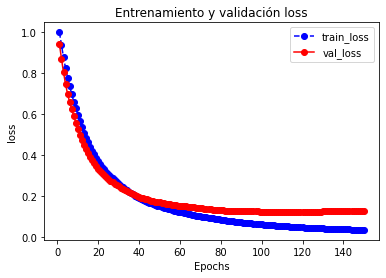

In [15]:
plot_metric(prey, 'loss')


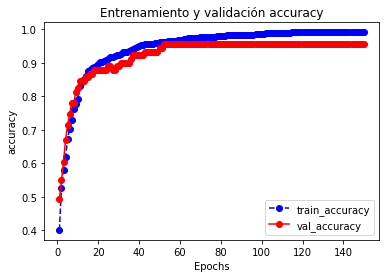

In [16]:
plot_metric(prey, 'accuracy')